In [1]:
# Import necessary library to draw the graph
import torch
import matplotlib.pyplot as plt

In [2]:
# Prepare dataset
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

In [3]:
# Design model using class
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x): 
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

In [4]:
epoch_list = []
loss_list = []

In [5]:
# Construct loss and optimizer
# criterion = torch.nn.MSELoss(size_average = False)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer = torch.optim.Adamax(model.parameters(), lr=0.01)
# optimizer = torch.optim.ASGD(model.parameters(), lr=0.01)
# optimizer = torch.optim.LBFGS(model.parameters(), lr=0.01)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
# optimizer = torch.optim.Rprop(model.parameters(), lr=0.01)

In [6]:
# Training cycle forward, backward, update
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
#     print(epoch, loss)

    epoch_list.append(epoch)
    loss_list.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [7]:
# Output weight and bais
print('w = ', model.linear.weight.item())
print('n = ', model.linear.bias.item())

w =  0.5824580192565918
n =  0.12153082340955734


In [8]:
# Test model
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

y_pred =  tensor([[2.4514]])


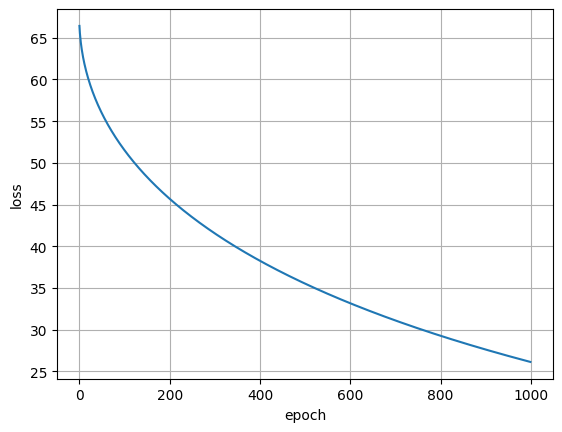

In [9]:
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.show() 